# ANALYSES
####1.The timestamp has no effect on the tweets sentiment analysis. Meaning no matter how current the tweet, the time is independent of the content (ie, more positive information in the day and more negative information in the evening)
####2.There have not been many tweets with a compound score of 1.0 meaning that there are no recent news tweets with enough positive sentiment analysis to increase the compound score, which means that the news has been generally negative
####3. There is a lot of overlap between all news feeds at 0.0, implying that there is enough pos and neg analysis to zero out the compound....so perhaps we can infer that the news has an equal balance of pos and neg content. 

In [53]:

#Dependencies 
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
#Twitter API Keys
consumer_key = 'wOuObtxETjIrRImGH7PoWBDk8'
consumer_secret = 'ErKd6eKDvuzijoMaeV3mP1Lp9ACKwzL2MlLCCJHuebahT8zsSE'
access_token = '361530585-wd0bxaVjDlyBhnsaVAiTmVwbzoyMVmYLa3TtORVB'
access_token_secret = 'F0gseOFsJkJiSFMT7dnuCbVAbI5onNp8aaVs3YdzVJjdL'

In [5]:
#API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
#We are going to retrieve data from a list of target_users and by using a forloop we will be able to loop through 
##the last 100 tweets of each user and perform sentiment analysis. we will graph the compound

#part A: Store the sentiment analysis in a list and a dataframe


In [35]:
#part B: Retrieving last 100 tweets of target_users and performing sentiment analysis on tweets. 

tweets=[]
target_users = ['@BBC','@CNN','@CBSNews','@FOXNews','@nytimes']

sentiment_analysis=[]
for x in range(5):
    
    for user in target_users:
        public_tweets = api.user_timeline(user, page=x)
    #     print(json.dumps(public_tweets,indent=4,sort_keys=True))
        for tweet in public_tweets:
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

#             tweets.append(tweet['text'])
            
            #store the sentiment analysis in a dataframe
            sentiment_analysis.append({'Compound': compound, 'Positive': pos, 'Negative':neg, 'Neutral':neu,'User': tweet['user']['screen_name'],
                                       'Date': tweet[ "created_at"],'Tweet': tweet['text']})

        
sentiments_pd = pd.DataFrame.from_dict(sentiment_analysis)
sentiments_pd = sentiments_pd[sentiments_pd.Date.notnull() & sentiments_pd.Tweet.notnull()]
sentiments_pd

Compound                            Date  Negative  Neutral  Positive  \
0      0.0000  Sun Jan 14 20:15:03 +0000 2018     0.000    1.000     0.000   
1     -0.0790  Sun Jan 14 20:00:09 +0000 2018     0.142    0.731     0.128   
2     -0.2023  Sun Jan 14 19:30:08 +0000 2018     0.182    0.677     0.141   
3      0.0772  Sun Jan 14 19:00:07 +0000 2018     0.188    0.598     0.214   
4      0.2960  Sun Jan 14 18:33:04 +0000 2018     0.000    0.891     0.109   
5     -0.0772  Sun Jan 14 18:00:06 +0000 2018     0.098    0.902     0.000   
6      0.9423  Sun Jan 14 17:30:08 +0000 2018     0.000    0.377     0.623   
7      0.2003  Sun Jan 14 17:02:03 +0000 2018     0.000    0.905     0.095   
8     -0.4767  Sun Jan 14 16:30:09 +0000 2018     0.162    0.838     0.000   
9      0.0000  Sun Jan 14 16:00:06 +0000 2018     0.000    1.000     0.000   
10    -0.1027  Sun Jan 14 15:00:10 +0000 2018     0.116    0.789     0.095   
11     0.0000  Sun Jan 14 14:00:04 +0000 2018     0.000    1.000     0.000   
12     0.7264  Sun Jan 14 13:26:03 +0000 2018     0.000    0.679     0.321   
13     0.5093  Sun Jan 14 13:03:04 +0000 2018     0.000    0.859     0.141   
14    -0.7650  Sun Jan 14 12:30:07 +0000 2018     0.306    0.694     0.000   
15     0.0000  Sun Jan 14 12:00:07 +0000 2018     0.000    1.000     0.000   
16    -0.3612  Sun Jan 14 11:30:09 +0000 2018     0.217    0.783     0.000   
17     0.8803  Sun Jan 14 11:18:04 +0000 2018     0.000    0.662     0.338   
18     0.3612  Sun Jan 14 11:03:03 +0000 2018     0.000    0.839     0.161   
19     0.8113  Sun Jan 14 10:42:37 +0000 2018     0.000    0.599     0.401   
20    -0.4939  Mon Jan 15 04:01:51 +0000 2018     0.211    0.789     0.000   
21     0.0000  Mon Jan 15 03:53:02 +0000 2018     0.000    1.000     0.000   
22     0.6209  Mon Jan 15 03:47:03 +0000 2018     0.066    0.701     0.233   
23    -0.3400  Mon Jan 15 03:41:06 +0000 2018     0.136    0.794     0.070   
24     0.6369  Mon Jan 15 03:31:21 +0000 2018     0.000    0.704     0.296   
25    -0.4019  Mon Jan 15 03:30:05 +0000 2018     0.231    0.769     0.000   
26     0.0000  Mon Jan 15 03:19:41 +0000 2018     0.000    1.000     0.000   
27    -0.4404  Mon Jan 15 03:06:51 +0000 2018     0.139    0.861     0.000   
28     0.7506  Mon Jan 15 02:58:02 +0000 2018     0.000    0.766     0.234   
29    -0.5423  Mon Jan 15 02:48:54 +0000 2018     0.410    0.432     0.158   
..        ...                             ...       ...      ...       ...   
470    0.0000  Sun Jan 14 22:14:00 +0000 2018     0.000    1.000     0.000   
471    0.0000  Sun Jan 14 22:12:39 +0000 2018     0.000    1.000     0.000   
472    0.0000  Sun Jan 14 22:12:14 +0000 2018     0.000    1.000     0.000   
473   -0.4215  Sun Jan 14 22:05:06 +0000 2018     0.237    0.763     0.000   
474    0.0000  Sun Jan 14 22:04:08 +0000 2018     0.000    1.000     0.000   
475   -0.8625  Sun Jan 14 21:59:04 +0000 2018     0.490    0.510     0.000   
476   -0.3400  Sun Jan 14 21:56:32 +0000 2018     0.211    0.789     0.000   
477   -0.6908  Sun Jan 14 21:56:04 +0000 2018     0.251    0.749     0.000   
478   -0.1779  Sun Jan 14 21:54:36 +0000 2018     0.169    0.693     0.139   
479    0.0000  Sun Jan 14 21:50:03 +0000 2018     0.000    1.000     0.000   
480    0.4588  Sun Jan 14 15:00:18 +0000 2018     0.133    0.600     0.267   
481    0.4215  Sun Jan 14 14:46:02 +0000 2018     0.000    0.798     0.202   
482    0.0000  Sun Jan 14 14:33:01 +0000 2018     0.000    1.000     0.000   
483   -0.7506  Sun Jan 14 14:15:02 +0000 2018     0.299    0.701     0.000   
484    0.0000  Sun Jan 14 14:00:13 +0000 2018     0.000    1.000     0.000   
485    0.0000  Sun Jan 14 13:49:03 +0000 2018     0.000    1.000     0.000   
486    0.0000  Sun Jan 14 13:36:04 +0000 2018     0.000    1.000     0.000   
487   -0.1027  Sun Jan 14 13:15:07 +0000 2018     0.167    0.641     0.192   
488    0.0000  Sun Jan 14 13:09:09 +0000 2018     0.000    1.000     0.000   
489   -0.7351  Sun Jan 14 1

In [110]:
sentiments_pd.to_csv('500tweets.csv')

In [75]:
compound_df = sentiments_pd[['Compound','Date','Tweet',"User"]].copy()
compound_df.head()

Compound                            Date  \
0    0.0000  Sun Jan 14 20:15:03 +0000 2018   
1   -0.0790  Sun Jan 14 20:00:09 +0000 2018   
2   -0.2023  Sun Jan 14 19:30:08 +0000 2018   
3    0.0772  Sun Jan 14 19:00:07 +0000 2018   
4    0.2960  Sun Jan 14 18:33:04 +0000 2018   

                                               Tweet User  
0  Britain is the only place in the world with a ...  BBC  
1  Long nights, snowshoes and a broken down boat....  BBC  
2  Ten times pop culture romanticised sexual hara...  BBC  
3  No sympathy from the camera operator at all. 😂...  BBC  
4  On the 65th anniversary of the Coronation, the...  BBC

In [38]:
bbc_df = compound_df[['Compound','Date','Tweet',"User"]].copy()
bbc_df = bbc_df[bbc_df['User']=='BBC']
bbc_df

cbs_df = compound_df[['Compound','Date','Tweet',"User"]].copy()
cbs_df = cbs_df[cbs_df['User']=='CBSNews']
cbs_df

cnn_df = compound_df[['Compound','Date','Tweet',"User"]].copy()
cnn_df = cnn_df[cnn_df['User']=='CNN']
cnn_df

fox_df = compound_df[['Compound','Date','Tweet',"User"]].copy()
fox_df = fox_df[fox_df['User']== 'FoxNews']
fox_df

nytimes_df = compound_df[['Compound','Date','Tweet',"User"]].copy()
nytimes_df = nytimes_df[nytimes_df['User']== 'nytimes']
nytimes_df.head()

Compound                            Date  \
80   -0.3400  Mon Jan 15 02:22:26 +0000 2018   
81    0.5574  Mon Jan 15 02:09:54 +0000 2018   
82    0.0000  Mon Jan 15 01:55:56 +0000 2018   
83   -0.3818  Mon Jan 15 01:49:14 +0000 2018   
84    0.0000  Mon Jan 15 01:41:54 +0000 2018   

                                                Tweet     User  
80  ‘I’m Not a Racist,’ Trump Says in Denying Vulg...  nytimes  
81  Male sea turtles are disappearing from Austral...  nytimes  
82  Breaking News: "I'm not a racist." President T...  nytimes  
83  Vikings Shock Saints on Last-Second Touchdown ...  nytimes  
84  "You can't look down to read the speech, you h...  nytimes

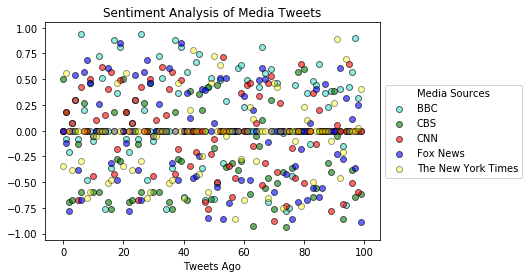

In [111]:

bbc = (plt.scatter(np.arange(len(bbc_df["Compound"])), bbc_df["Compound"],c='turquoise', marker='o',alpha=0.6,edgecolors='black',label='BBC'))
cbs = (plt.scatter(np.arange(len(cbs_df["Compound"])), cbs_df["Compound"],c='green', marker='o',alpha=0.6,edgecolors='black',label='CBS'))
cnn = (plt.scatter(np.arange(len(cnn_df["Compound"])), cnn_df["Compound"],c='red', marker='o',alpha=0.6,edgecolors='black',label='CNN'))
fox = (plt.scatter(np.arange(len(fox_df["Compound"])), fox_df["Compound"],c='blue', marker='o',alpha=0.6,edgecolors='black',label='Fox News'))
nyt = (plt.scatter(np.arange(len(nytimes_df["Compound"])), nytimes_df["Compound"],c='yellow', marker='o',alpha=0.4,edgecolors='black', label='The New York Times'))
plt.legend(title='Media Sources',loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Sentiment Analysis of Media Tweets')
plt.xlabel('Tweets Ago')
plt.savefig('tweets.png')
plt.show()


In [99]:
# media = ['@BBC','@CNN','@CBSNews','@FOXNews','@nytimes']
# x_axis = np.arange(len(media))
media = 'BBC'
averagemedia = bbc_df['Compound'].mean(axis=0)
plt.bar(media,averagemedia,color='r',alpha='0.6',align='edge')
plt.xticks(tick_locations,['BBC'])

TypeError: '<' not supported between instances of 'str' and 'int'

In [93]:
bbc_df['Compound'].mean(axis=0)

0.13103699999999996